In [1]:
import pandas as pd
from IPython.display import display
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dir_suffix = "data/"
dir_suffix_entpackt = dir_suffix + "Daten_ausgepackt/"

In [ ]:
print("Tip25W Testdaten Template:")
testdata = pd.read_csv(dir_suffix+"tip25W_testdaten_template.csv")

display(testdata.head(12))

print("Tip25W Trainingsdaten:")
trainingdata = pd.read_csv(dir_suffix+"tip25W_trainingsdaten.csv")
# ist das gleiche wie orders gefiltert nach nur prior und das gleiche wie der prior Datensatz
#trainingdata = trainingdata[:300000]
display(trainingdata.head(11))

print("Prior:")
df_orders_prior = pd.read_csv(dir_suffix_entpackt+ "order_products__prior.csv")
display(df_orders_prior.head(10))

print("train:")
df_orders_train = pd.read_csv(dir_suffix_entpackt + "order_products__train.csv")
display(df_orders_train)

print("orders")
df_orders = pd.read_csv(dir_suffix_entpackt + "orders.csv")
display(df_orders.head(10))

print("products:")
df_products = pd.read_csv(dir_suffix_entpackt + "products.csv")
display(df_products.head(10))



Tip25W Testdaten Template:


,Unnamed: 0,order_id,tip,tip_pc
0,10,1187899,NaN,NaN
1,25,1492625,NaN,NaN
2,49,2196797,NaN,NaN
3,74,525192,NaN,NaN
4,78,880375,NaN,NaN
5,82,1094988,NaN,NaN
6,88,1822501,NaN,NaN
7,115,1827621,NaN,NaN
8,129,2316178,NaN,NaN
9,200,2180313,NaN,NaN


Tip25W Trainingsdaten:


,Unnamed: 0,order_id,tip,tip_pc
0,0,2539329,True,0.092177
1,1,2398795,False,0.000000
2,2,473747,False,0.000000
3,3,2254736,True,0.102231
4,4,431534,True,0.092990
5,5,3367565,False,0.000000
6,6,550135,False,0.000000
7,7,3108588,False,0.000000
8,8,2295261,False,0.000000
9,9,2550362,False,0.000000


Prior:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


train:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


products:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


np.float64(0.0)

In [3]:

merged = trainingdata.merge(df_orders_prior, on="order_id", how="left")
merged = merged.merge(df_orders, on="order_id", how="left")

merged = merged.fillna(0)

#order_merged = order_merged.merge(df_products, on="product_id", how="left")
display(merged.head(5))
print(merged["eval_set"].unique())

,Unnamed: 0,order_id,tip,tip_pc,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,2539329,True,0.092177,196,1,0,1,prior,1,2,8,0.0
1,0,2539329,True,0.092177,14084,2,0,1,prior,1,2,8,0.0
2,0,2539329,True,0.092177,12427,3,0,1,prior,1,2,8,0.0
3,0,2539329,True,0.092177,26088,4,0,1,prior,1,2,8,0.0
4,0,2539329,True,0.092177,26405,5,0,1,prior,1,2,8,0.0


['prior']


In [4]:

order_features = (
    df_orders_prior
    .groupby("order_id")
    .agg(
        num_products=("product_id", "count"),
        num_reordered=("reordered", "sum"),
        avg_add_to_cart=("add_to_cart_order", "mean"),
        max_add_to_cart=("add_to_cart_order", "max"),
    )
    .reset_index()
)

prior_with_dept = df_orders_prior.merge(
    df_products[["product_id", "department_id"]],
    on="product_id",
    how="left"
)

dept_counts = (
    prior_with_dept
    .groupby(["order_id", "department_id"])
    .size()
    .unstack(fill_value=0)
)

dept_counts.columns = [f"department_id_{int(c)}" for c in dept_counts.columns]
dept_counts = dept_counts.reset_index()

order_features = order_features.merge(
    dept_counts,
    on="order_id",
    how="left"
)



order_features = order_features.merge(
    df_orders,
    on="order_id",
    how="left"
)

final_df = order_features.merge(
    trainingdata[["order_id", "tip", "tip_pc"]],
    on="order_id",
    how="left"
)
final_df["order_dow_sin"] = np.sin(2 * np.pi * final_df["order_dow"] / 7)
final_df["order_dow_cos"] = np.cos(2 * np.pi * final_df["order_dow"] / 7)

# Stunde (0–23)
final_df["order_hour_sin"] = np.sin(2 * np.pi * final_df["order_hour_of_day"] / 24)
final_df["order_hour_cos"] = np.cos(2 * np.pi * final_df["order_hour_of_day"] / 24)

""" df_day_encoded = pd.get_dummies(final_df, columns=["order_dow"], prefix="dow",drop_first=False)
df_day_encoded

df_encoded_final = pd.get_dummies(df_day_encoded, columns=["order_hour_of_day"], prefix="hour",drop_first=False)
df_encoded_final
df_encoded_final.head(10) """


' df_day_encoded = pd.get_dummies(final_df, columns=["order_dow"], prefix="dow",drop_first=False)\ndf_day_encoded\n\ndf_encoded_final = pd.get_dummies(df_day_encoded, columns=["order_hour_of_day"], prefix="hour",drop_first=False)\ndf_encoded_final\ndf_encoded_final.head(10) '

In [5]:
df = final_df.copy()
df = df.sort_values(["user_id", "order_number"]).reset_index(drop=True)


tip_past = df.groupby("user_id")["tip"].shift(1).astype("float")
df["tip_last_order"] = tip_past.fillna(0).astype(int)

tip_past_pc = df.groupby("user_id")["tip_pc"].shift(1).astype("float")
df["tip_last_order_pc"] = (tip_past_pc * 100).fillna(0).round(0).astype(int)

df["tips_past_pc"] = df["tip_last_order_pc"].groupby(df["user_id"]).cumsum()
df["tips_past"] = df["tip_last_order"].groupby(df["user_id"]).cumsum()
df["orders_past"] = tip_past.groupby(df["user_id"]).cumcount()
df["tip_rate_past"] = (df["tips_past"] / df["orders_past"]).where(df["orders_past"] > 0, 0.0)
df["tip_rate_past_pc"] = (df["tips_past_pc"] / df["orders_past"]).where(df["orders_past"] > 0, 0.0)

tips_3 = (
    tip_past
    .groupby(df["user_id"])
    .rolling(window=3, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)
orders_3 = (
    tip_past
    .groupby(df["user_id"])
    .rolling(window=3, min_periods=1)
    .count()
    .reset_index(level=0, drop=True)
)

df["tip_rate_past_3"] = (tips_3 / orders_3).where(orders_3 > 0, 0.0)
df["reorder_ratio"] = (df["num_reordered"] / df["num_products"].replace(0, 1)) * 100

df.head(20)

,order_id,num_products,num_reordered,avg_add_to_cart,max_add_to_cart,department_id_1,department_id_2,department_id_3,department_id_4,department_id_5,...,order_hour_cos,tip_last_order,tip_last_order_pc,tips_past_pc,tips_past,orders_past,tip_rate_past,tip_rate_past_pc,tip_rate_past_3,reorder_ratio
0,2539329,5,0,3.0,5,0,0,0,0,0,...,-0.500000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2398795,6,3,3.5,6,0,0,0,1,0,...,-0.258819,1,9,9,1,1,1.000000,9.000000,1.000000,50.000000
2,473747,5,3,3.0,5,0,0,0,0,0,...,-1.000000,0,0,9,1,2,0.500000,4.500000,0.500000,60.000000
3,2254736,5,5,3.0,5,0,0,0,0,0,...,-0.258819,0,0,9,1,3,0.333333,3.000000,0.333333,100.000000
4,431534,8,5,4.5,8,0,0,0,4,0,...,-0.707107,1,10,19,2,4,0.500000,4.750000,0.333333,62.500000
5,3367565,4,4,2.5,4,0,0,0,0,0,...,-0.258819,1,9,28,3,5,0.600000,5.600000,0.666667,100.000000
6,550135,5,5,3.0,5,0,0,0,0,0,...,-0.707107,0,0,28,3,6,0.500000,4.666667,0.666667,100.000000
7,3108588,6,4,3.5,6,0,0,0,0,0,...,-0.866025,0,0,28,3,7,0.428571,4.000000,0.333333,66.666667
8,2295261,6,6,3.5,6,0,0,0,0,0,...,-0.500000,0,0,28,3,8,0.375000,3.500000,0.000000,100.000000
9,2550362,9,6,5.0,9,0,0,0,0,0,...,-0.500000,0,0,28,3,9,0.333333,3.111111,0.000000,66.666667


In [21]:
df[[
    "num_products",
    "tip_pc",
    "orders_past",
    "tip_rate_past_pc"
]].describe(percentiles=[.01, .05, .95, .99])

,num_products,tip_pc,orders_past,tip_rate_past_pc
count,3.214874e+06,3.214874e+06,3.214874e+06,3.214874e+06
mean,1.008888e+01,7.790044e-02,1.619107e+01,7.323707e+00
std,7.525398e+00,6.578102e-02,1.779950e+01,5.236399e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+00,1.023381e-01,1.000000e+01,7.588235e+00
95%,2.500000e+01,1.638294e-01,5.400000e+01,1.500000e+01
99%,3.500000e+01,1.806936e-01,8.100000e+01,1.600000e+01
max,1.450000e+02,2.386808e-01,9.800000e+01,2.300000e+01


In [6]:
df = df.drop(["order_id", "avg_add_to_cart","max_add_to_cart", "user_id","eval_set", "order_dow", "order_hour_of_day"],axis=1)
display(df)

,num_products,num_reordered,department_id_1,department_id_2,department_id_3,department_id_4,department_id_5,department_id_6,department_id_7,department_id_8,...,order_hour_cos,tip_last_order,tip_last_order_pc,tips_past_pc,tips_past,orders_past,tip_rate_past,tip_rate_past_pc,tip_rate_past_3,reorder_ratio
0,5,0,0,0,0,0,0,0,1,0,...,-5.000000e-01,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,6,3,0,0,0,1,0,0,1,0,...,-2.588190e-01,1,9,9,1,1,1.000000,9.000000,1.000000,50.000000
2,5,3,0,0,0,0,0,0,1,0,...,-1.000000e+00,0,0,9,1,2,0.500000,4.500000,0.500000,60.000000
3,5,5,0,0,0,0,0,0,1,0,...,-2.588190e-01,0,0,9,1,3,0.333333,3.000000,0.333333,100.000000
4,8,5,0,0,0,4,0,0,1,0,...,-7.071068e-01,1,10,19,2,4,0.500000,4.750000,0.333333,62.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,3,3,0,0,0,0,0,0,1,0,...,-7.071068e-01,0,0,17,2,8,0.250000,2.125000,0.000000,100.000000
3214870,9,3,1,0,1,1,0,0,1,0,...,-1.836970e-16,1,8,25,3,9,0.333333,2.777778,0.333333,33.333333
3214871,8,6,0,0,1,1,0,0,1,0,...,-8.660254e-01,0,0,25,3,10,0.300000,2.500000,0.333333,75.000000
3214872,20,14,0,0,2,5,0,0,1,0,...,-1.000000e+00,0,0,25,3,11,0.272727,2.272727,0.333333,70.000000


In [7]:
dept_cols = [c for c in df.columns if c.startswith("department_id_")]

display(dept_cols)

dep_tip_count = (
    df[dept_cols].gt(0)
    .astype(int)
    .sum()
)

avg_tip_per_dept = (
    df[dept_cols].gt(0)
    .astype(int)
    .multiply(df["tip_pc"], axis=0)
    .sum()
    /dep_tip_count
)




for elem in dept_cols:
    df[elem.replace("department_id_", "dept_share_")] = df[elem] / df["num_products"]



['department_id_1',
 'department_id_2',
 'department_id_3',
 'department_id_4',
 'department_id_5',
 'department_id_6',
 'department_id_7',
 'department_id_8',
 'department_id_9',
 'department_id_10',
 'department_id_11',
 'department_id_12',
 'department_id_13',
 'department_id_14',
 'department_id_15',
 'department_id_16',
 'department_id_17',
 'department_id_18',
 'department_id_19',
 'department_id_20',
 'department_id_21']

In [8]:
display(merged.head(1))

order_df = df

,Unnamed: 0,order_id,tip,tip_pc,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,2539329,True,0.092177,196,1,0,1,prior,1,2,8,0.0


In [9]:



#X["is_first_order"] = (X["order_number"] == 1).astype(int)
#X["days_since_prior_order"] = X["days_since_prior_order"].fillna(0)
#X.head(10)

order_df.head(3)


single = order_df.tail(1) 
order_df =  order_df.iloc[:-1].copy() 

order_df = order_df.fillna(0)



In [10]:
X = order_df.drop(columns=["tip_pc","tip"])




y = order_df["tip_pc"]
y_logistic = order_df["tip"].astype(int)

X_train, X_test, y_train_reg, y_test_reg, y_train_log, y_test_log = train_test_split(
    X, y, y_logistic,
    test_size=0.2,
    random_state=42
)

In [11]:
X_train.head(3)
X_test

,num_products,num_reordered,department_id_1,department_id_2,department_id_3,department_id_4,department_id_5,department_id_6,department_id_7,department_id_8,...,dept_share_12,dept_share_13,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21
737360,3,3,0,0,1,1,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
1215397,5,4,0,0,3,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000
2209486,10,9,0,0,0,6,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
778849,19,16,2,0,1,11,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000
621365,14,14,0,0,0,3,0,0,0,0,...,0.000000,0.071429,0.142857,0.071429,0.071429,0.214286,0.000000,0.142857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789837,9,6,0,0,1,4,0,0,1,0,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111
1293193,39,36,0,0,1,1,0,0,8,0,...,0.000000,0.025641,0.000000,0.000000,0.205128,0.000000,0.000000,0.461538,0.051282,0.000000
2885702,24,15,2,0,0,7,0,1,4,0,...,0.041667,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.208333,0.041667,0.000000
1728032,29,29,1,0,2,7,0,0,4,0,...,0.000000,0.068966,0.034483,0.034483,0.103448,0.034483,0.068966,0.103448,0.034483,0.000000


In [12]:
numeric_features = [
    "tip",
    "product_id",
    "add_to_cart_order",
    "reordered",
    "user_id",
    "order_number",
    "order_dow",
    "order_hour_of_day"
    
]
categorical_features = [
    "product_name"
]


""" preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
) """


' preprocessor = ColumnTransformer(\n    transformers=[\n        ("num", StandardScaler(), numeric_features)\n    ]\n) '

In [13]:

order_df.head(5)
X_test

,num_products,num_reordered,department_id_1,department_id_2,department_id_3,department_id_4,department_id_5,department_id_6,department_id_7,department_id_8,...,dept_share_12,dept_share_13,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21
737360,3,3,0,0,1,1,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
1215397,5,4,0,0,3,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000
2209486,10,9,0,0,0,6,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
778849,19,16,2,0,1,11,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000
621365,14,14,0,0,0,3,0,0,0,0,...,0.000000,0.071429,0.142857,0.071429,0.071429,0.214286,0.000000,0.142857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789837,9,6,0,0,1,4,0,0,1,0,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111
1293193,39,36,0,0,1,1,0,0,8,0,...,0.000000,0.025641,0.000000,0.000000,0.205128,0.000000,0.000000,0.461538,0.051282,0.000000
2885702,24,15,2,0,0,7,0,1,4,0,...,0.041667,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.208333,0.041667,0.000000
1728032,29,29,1,0,2,7,0,0,4,0,...,0.000000,0.068966,0.034483,0.034483,0.103448,0.034483,0.068966,0.103448,0.034483,0.000000


In [14]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score


log_model = LogisticRegression(
    max_iter=2000
)


model = LinearRegression()
""" model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=300,         # entspricht grob n_estimators
    early_stopping=True,  # stoppt wenn’s nicht mehr besser wird
    random_state=42
) """

log_pipeline = Pipeline(
    steps=[
        ("preprocessor", StandardScaler()),
        ("model", log_model)
    ]
)


pipeline = Pipeline(
    steps=[
        ("preprocessor", StandardScaler()),
        ("model", model)
    ]
)


log_pipeline.fit(X_train, y_train_log)
pipeline.fit(X_train, y_train_reg)

y_tip_proba = log_pipeline.predict_proba(X_test)[:, 1]
y_tip_pred  = (y_tip_proba >= 0.45).astype(int)

y_tip_pc_pred = pipeline.predict(X_test)
y_tip_pc_final = y_tip_pc_pred.copy()
y_tip_pc_final[y_tip_pred == 0] = 0.0

print("AUC:", roc_auc_score(y_test_log, y_tip_proba))
print("Accuracy:", accuracy_score(y_test_log, y_tip_pred))
print(classification_report(y_test_log, y_tip_pred))

display(single["tip_pc"])

single_pred = single.drop(["tip_pc"], axis=1)

#print(pipeline.predict(single_pred))

print("MAE:", mean_absolute_error(y_test_reg, y_tip_pc_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_tip_pc_final)))
print("R²:", r2_score(y_test_reg, y_tip_pc_final))

AUC: 0.8488554613506667
Accuracy: 0.7723675104008709
              precision    recall  f1-score   support

           0       0.73      0.66      0.69    251197
           1       0.79      0.85      0.82    391778

    accuracy                           0.77    642975
   macro avg       0.76      0.75      0.76    642975
weighted avg       0.77      0.77      0.77    642975



3214873    0.08858
Name: tip_pc, dtype: float64

MAE: 0.0358583553363685
RMSE: 0.05197194054867262
R²: 0.37554838510932476


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = log_pipeline.named_steps["preprocessor"]
log_model = log_pipeline.named_steps["model"]

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

import shap

explainer = shap.LinearExplainer(
    log_model,
    X_train_scaled,
    feature_names=X.columns
)

shap_values = explainer(X_test_scaled)


c:\Users\Matte\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


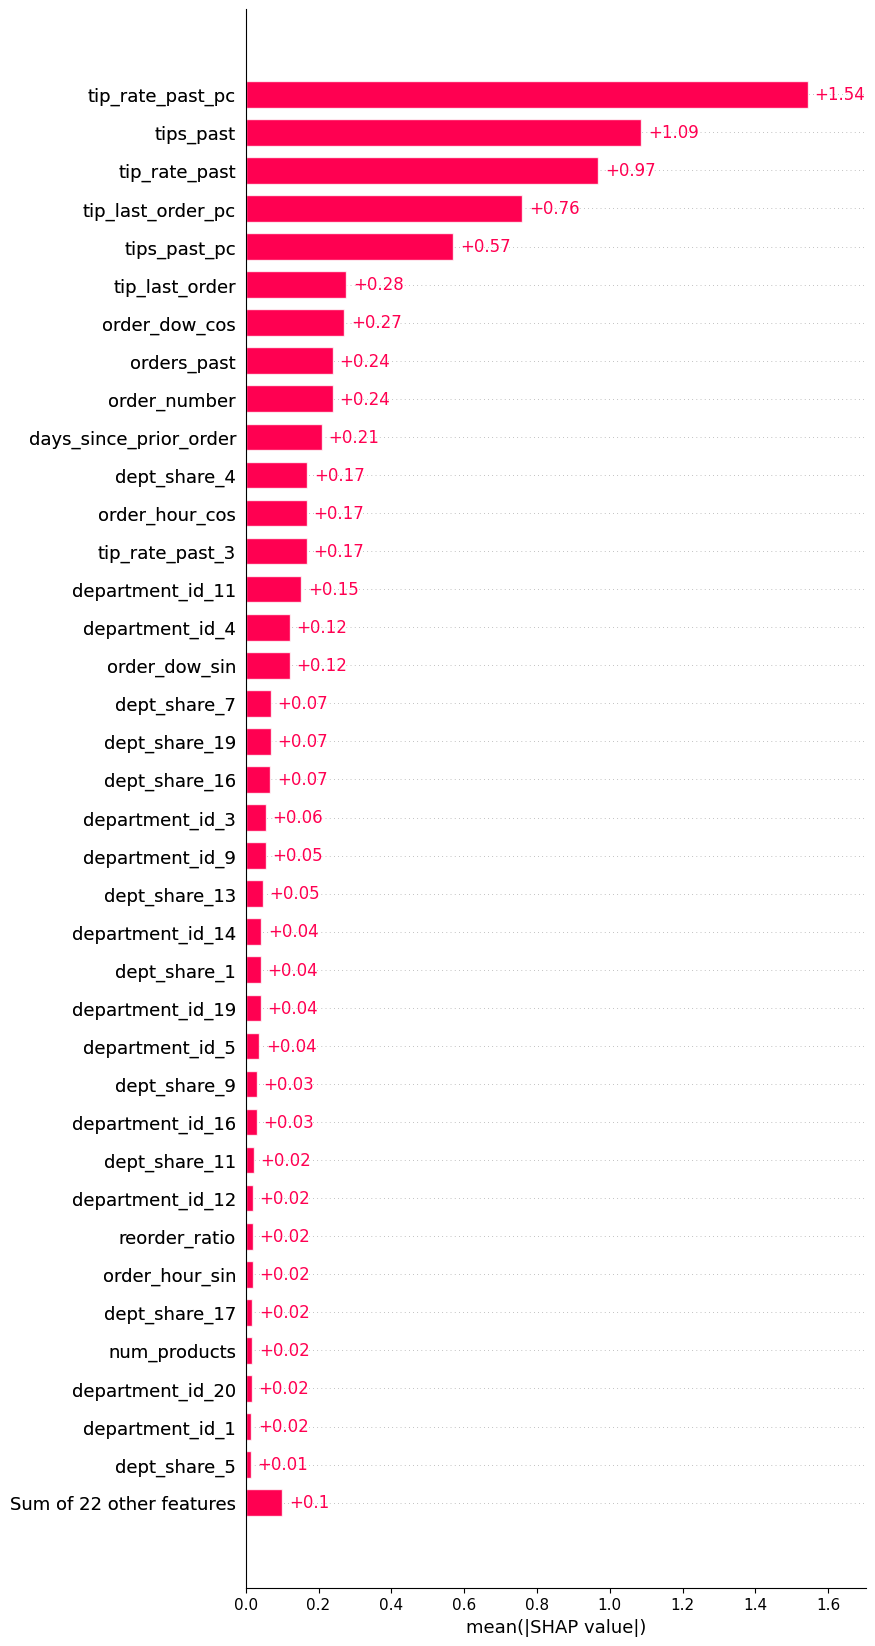

In [16]:
shap.plots.bar(shap_values, max_display=38)